# 1. Libraries and Datasets

In [216]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime
from datetime import date

In [217]:
# Import the datasets, 
# Specify the delimeter and header

# Describes static characteristics of an account
df_account = pd.read_csv('account.csv', delimiter=';', header=0)

# Describes a credit card issued to an account
# df_card = pd.read_csv('card.csv', delimiter=';', header=0)

# Describes characteristics of a client
df_client = pd.read_csv('client.csv', delimiter=';', header=0)

# Relates together a client with an account
df_disp = pd.read_csv('disp.csv', delimiter=';', header=0)

# Describes demographic characteristics of a district
df_district = pd.read_csv('district.csv', delimiter=';', header=0)

# Describes a loan granted for a given account
# df_loan = pd.read_csv('loan.csv', delimiter=';', header=0)

# Describes characteristics of a payment order
df_order = pd.read_csv('order.csv', delimiter=';', header=0)

# Describes one transaction on an account
df_trans = pd.read_csv('trans.csv', delimiter=';', header=0)

C:\Users\carol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [218]:
df_account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [219]:
df_card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [220]:
df_client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [221]:
df_disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [222]:
df_district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [223]:
df_loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [224]:
df_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [225]:
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


# 2. Data Cleaning

### 2.1. Column Cleaning

In [226]:
# Index the account_id unique identifier
df_account = df_account.set_index('account_id')

In [227]:
# Drop df_account unnecessary data
df_account.drop(columns=['frequency', 'date'], inplace=True)

# Drop df_client unnecessary data
df_client.drop(columns=['district_id'], inplace=True)

# Drop df_disp unnecessary data
df_disp.drop(columns=['type'], inplace=True)

# Drop all demographic data except district name and region
df_district.drop(columns=['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A13', 'A14', 'A15', 'A16'], inplace=True)

# Drop df_order unnecessary data
df_order.drop(columns=['bank_to', 'k_symbol'], inplace=True)

# Drop df_trans unnecessary data
df_trans.drop(columns=['balance', 'k_symbol', 'bank'], inplace=True)

In [228]:
# Rename the necessary columns
df_order.rename(columns={'account_to': 'order_receiver'}, inplace=True)
df_order.rename(columns={'amount': 'order_amount'}, inplace=True)
df_trans.rename(columns={'date': 'trans_date'}, inplace=True)
df_trans.rename(columns={'type': 'trans_type'}, inplace=True)
df_trans.rename(columns={'operation': 'trans_mode'}, inplace=True)
df_trans.rename(columns={'amount': 'trans_amount'}, inplace=True)
df_trans.rename(columns={'account': 'trans_receiver'}, inplace=True)
df_district.rename(columns={'A1': 'district_id'}, inplace=True)
df_district.rename(columns={'A2': 'district_name'}, inplace=True)
df_district.rename(columns={'A3': 'district_region'}, inplace=True)
df_district.rename(columns={'A11': 'average_salary'}, inplace=True)

### 2.2. Row cleaning

#### a) Date of birth, gender and age for df_client and df_trans

In [229]:
# Define a function to convert the date_of_birth and trans_date values to the formatted dates
def convert_to_date (df, col):
    df [col] = pd.to_datetime (df [col], format = '%y%m%d', errors = 'coerce') # Convertion, formatting and error handling
    return df

# Define a function to calculate the age from the birth year
def calculate_age (birth_year):
    age = birth_year.year
    return 1998 - age # The dataset is from 1998

# Define a function to check if a year is being read as 1900 or 2000
def fix_date (date):
    if date.year > 2000:
        date = date.replace (year = date.year - 100)
        return date
    else:
        return date

In [230]:
# Add the columns date_of_birth, gender and age to the df_client dataset
df_client = df_client.join(pd.DataFrame({'date_of_birth': np.nan, 'gender': np.nan, 'age': np.nan}, index = df_client.index))

In [231]:
# Fill the new gender column based on the 'birth_number'
df_client ['date_of_birth'] = df_client ['birth_number']
for idx, item in enumerate (df_client ['birth_number']):
    # The value is in the format YYMM+50DD for women
    if int (str (item) [2:4]) > 50: # Extract the month and check if it's greater than 50
        df_client.loc [idx, 'gender'] = "female"
        df_client.loc [idx, 'date_of_birth'] = item - 5000 # Subtract 5000 to get the actual date of birth in the right format
    else: 
        df_client.loc [idx, 'gender'] = "male"

In [232]:
# Call the function to convert the date_of_birth and trans_date values to the formatted dates
df_client = convert_to_date(df_client, 'date_of_birth') 
df_trans = convert_to_date(df_trans, 'trans_date')

In [233]:
# Call the function to check if a year is being read as 1900 or 2000
df_client ['date_of_birth'] = df_client ['date_of_birth'].apply(fix_date)

In [234]:
# Call the function to calculate the age
df_client['age'] = df_client['date_of_birth'].apply (calculate_age)

df_client.head()

,client_id,birth_number,date_of_birth,gender,age
0,1,706213,1970-12-13,female,28
1,2,450204,1945-02-04,male,53
2,3,406009,1940-10-09,female,58
3,4,561201,1956-12-01,male,42
4,5,605703,1960-07-03,female,38


#### b) Transaction types and modes for df_trans

In [235]:
# Change df_trans > type values to credit or debit
type_mapping = {'PRIJEM': 'credit', 'VYDAJ': 'debit'} # Define the mapping

# Replace values in the 'type' column using the mapping
df_trans['trans_type'] = df_trans['trans_type'].replace(type_mapping) # Replace the values

In [236]:
# Change df_trans > type values to its description
trans_mode_mapping = {'VYBER KARTOU': 'credit card withdrawal', 
                      'VKLAD': 'credit in cash', 
                      'PREVOD Z UCTU': 'collection from another bank',
                      'VYBER': 'withdrawal in cash', 
                      'PREVOD NA UCET': 'remittance to another bank'} # Define the mapping

# Replace values in the 'type' column using the mapping
df_trans['trans_mode'] = df_trans['trans_mode'].replace(trans_mode_mapping) # Replace the values
df_trans['trans_mode'] = df_trans['trans_mode'].fillna('unknown') # Replace the missing values with "unknown"

#### c) Currency convertion for df_order, df_trans and df_district

In [237]:
# Change df_order/df_trans > order_amount/trans_amount values from Czech Koruna to Euro

czk_to_eur = 0.040 # Define the actual exchange rate

# Define a function to convert from Czech Koruna to Euro
def convert_czk_to_eur(amount_czk):
    return amount_czk * czk_to_eur

# Apply the conversion function to the 'trans_amount' column
df_order['order_amount'] = df_order['order_amount'].apply(convert_czk_to_eur)
df_trans['trans_amount'] = df_trans['trans_amount'].apply(convert_czk_to_eur)
df_district['average_salary'] = df_district['average_salary'].apply(convert_czk_to_eur)

#### c) Null values correction for df_trans 

In [238]:
# Check the count of null values in the df_trans dataset
df_trans.isnull().sum()

trans_id               0
account_id             0
trans_date             0
trans_type             0
trans_mode             0
trans_amount           0
trans_receiver    760931
dtype: int64

In [239]:
# Define a function to fill the null values with the median
def fill_with_median(df, col):
    for column in col:
        df[col] = df[col].fillna(df[col].median())
    return df

to_fill = ['trans_receiver']
df_trans = fill_with_median(df_trans, to_fill)

In [240]:
# Check the count of null values in the df_trans dataset
df_trans.isnull().sum()

trans_id          0
account_id        0
trans_date        0
trans_type        0
trans_mode        0
trans_amount      0
trans_receiver    0
dtype: int64

# 3. Data Merging

In [241]:
# Merge df_account and df_order by account_id
df_merged = pd.merge(df_account, df_order, on='account_id', how='inner')

# Merge df_merged and df_trans by account_id
df_merged = pd.merge(df_merged, df_trans, on='account_id', how='left')

# Merge df_merged and df_disp by account_id
df_merged = pd.merge(df_merged, df_disp, on='account_id', how='left')

# Merge df_merged and df_client by client_id
df_merged = pd.merge(df_merged, df_client, on='client_id', how='left')

# Merge df_merged and df_district by district_id
df_merged = pd.merge(df_merged, df_district, on='district_id', how='left')

In [242]:
# Print the columns
df_merged.columns

Index(['account_id', 'district_id', 'order_id', 'order_receiver',
       'order_amount', 'trans_id', 'trans_date', 'trans_type', 'trans_mode',
       'trans_amount', 'trans_receiver', 'disp_id', 'client_id',
       'birth_number', 'date_of_birth', 'gender', 'age', 'district_name',
       'district_region', 'average_salary'],
      dtype='object')

In [243]:
# Drop more unnecessary data
df_merged.drop(columns=['district_id'], inplace=True)
df_merged.drop(columns=['order_id'], inplace=True)
df_merged.drop(columns=['trans_id'], inplace=True)
df_merged.drop(columns=['disp_id'], inplace=True)
df_merged.drop(columns=['client_id'], inplace=True)
df_merged.drop(columns=['birth_number'], inplace=True)

In [244]:
# Define the order of the columns
df_ordered = ['account_id', 
              'date_of_birth',
              'gender',
              'age',
              'order_amount', 
              'order_receiver', 
              'trans_amount', 
              'trans_receiver', 
              'trans_date', 
              'trans_type', 
              'trans_mode', 
              'district_region', 
              'district_name', 
              'average_salary']

# Reorder the columns
df_merged = df_merged[df_ordered]

In [245]:
# Print the columns
df_merged.columns

Index(['account_id', 'date_of_birth', 'gender', 'age', 'order_amount',
       'order_receiver', 'trans_amount', 'trans_receiver', 'trans_date',
       'trans_type', 'trans_mode', 'district_region', 'district_name',
       'average_salary'],
      dtype='object')

# 4. Data Understanding

In [246]:
# Print the number of rows and columns
df_merged.shape

(2087865, 14)

In [247]:
# Print information about the structure, data types, memory usage and missing values
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087865 entries, 0 to 2087864
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       int64         
 1   date_of_birth    datetime64[ns]
 2   gender           object        
 3   age              int64         
 4   order_amount     float64       
 5   order_receiver   int64         
 6   trans_amount     float64       
 7   trans_receiver   float64       
 8   trans_date       datetime64[ns]
 9   trans_type       object        
 10  trans_mode       object        
 11  district_region  object        
 12  district_name    object        
 13  average_salary   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 238.9+ MB


In [248]:
# Print the first 10 rows of df_merged
df_merged.head(10)

,account_id,date_of_birth,gender,age,order_amount,order_receiver,trans_amount,trans_receiver,trans_date,trans_type,trans_mode,district_region,district_name,average_salary
0,576,1936-01-11,female,62,146.48,71033382,36.000,45750951.0,1993-01-01,credit,credit in cash,south Moravia,Brno - venkov,349.72
1,576,1935-03-17,male,63,146.48,71033382,36.000,45750951.0,1993-01-01,credit,credit in cash,south Moravia,Brno - venkov,349.72
2,576,1936-01-11,female,62,146.48,71033382,248.280,30300313.0,1993-01-11,credit,collection from another bank,south Moravia,Brno - venkov,349.72
3,576,1935-03-17,male,63,146.48,71033382,248.280,30300313.0,1993-01-11,credit,collection from another bank,south Moravia,Brno - venkov,349.72
4,576,1936-01-11,female,62,146.48,71033382,0.804,45750951.0,1993-01-31,credit,unknown,south Moravia,Brno - venkov,349.72
5,576,1935-03-17,male,63,146.48,71033382,0.804,45750951.0,1993-01-31,credit,unknown,south Moravia,Brno - venkov,349.72
6,576,1936-01-11,female,62,146.48,71033382,248.280,30300313.0,1993-02-11,credit,collection from another bank,south Moravia,Brno - venkov,349.72
7,576,1935-03-17,male,63,146.48,71033382,248.280,30300313.0,1993-02-11,credit,collection from another bank,south Moravia,Brno - venkov,349.72
8,576,1936-01-11,female,62,146.48,71033382,1.184,45750951.0,1993-02-28,credit,unknown,south Moravia,Brno - venkov,349.72
9,576,1935-03-17,male,63,146.48,71033382,1.184,45750951.0,1993-02-28,credit,unknown,south Moravia,Brno - venkov,349.72


In [249]:
# Print the summary to visualize information such as count, mean, standard deviation, min and max
df_merged.describe()

,account_id,age,order_amount,order_receiver,trans_amount,trans_receiver,average_salary
count,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06
mean,3.101550e+03,4.333565e+01,1.265136e+02,4.938843e+07,2.251400e+02,4.610075e+07,3.817621e+02
std,2.656577e+03,1.585842e+01,1.076995e+02,2.886750e+07,3.687227e+02,1.823660e+07,5.354128e+01
min,1.000000e+00,1.100000e+01,4.000000e-02,3.990000e+02,0.000000e+00,0.000000e+00,3.244000e+02
25%,1.253000e+03,3.000000e+01,4.280000e+01,2.414495e+07,5.984000e+00,4.575095e+07,3.421600e+02
50%,2.494000e+03,4.300000e+01,9.788000e+01,4.965243e+07,7.936000e+01,4.575095e+07,3.596400e+02
75%,3.754000e+03,5.500000e+01,1.818000e+02,7.400112e+07,2.541600e+02,4.575095e+07,3.968000e+02
max,1.136200e+04,8.700000e+01,5.952800e+02,9.999420e+07,3.496000e+03,9.999420e+07,5.016400e+02


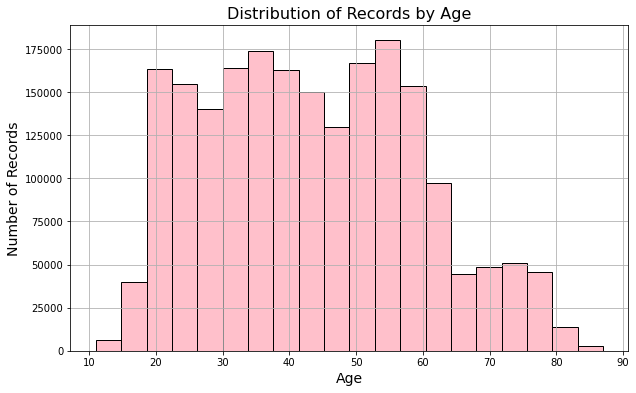

In [250]:
# Plot clients distribution by age
plt.figure(figsize=(10, 6))
plt.hist(df_merged['age'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Records by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.show()

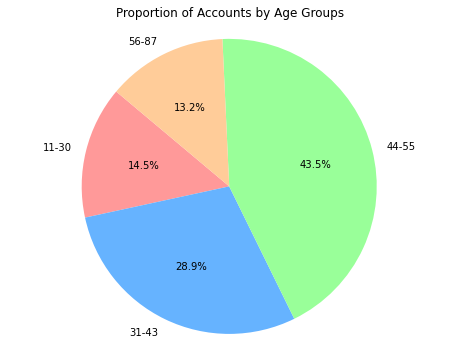

In [252]:
# Data for the pie chart
age_groups = ['10-20', '31-50', '51-55', '56-87']  # Age groups
account_counts = [1253000, 2494000, 3754000, 1136200]  # Corresponding account counts

# Colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(account_counts, labels=age_groups, autopct='%1.1f%%', startangle=140, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Proportion of Accounts by Age Groups')

# Show the plot
plt.show()

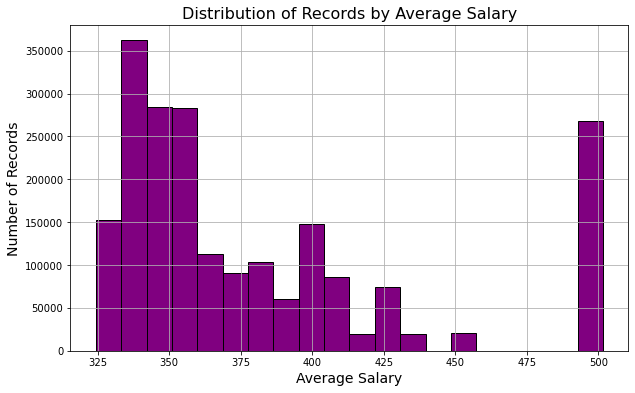

In [251]:
# Plot clients distribution by age
plt.figure(figsize=(10, 6))
plt.hist(df_merged['average_salary'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Records by Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.show()